In [303]:
import pandas as pd

from sklearn import metrics
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



About Dataset
The breast cancer dataset provides information for analysing and understanding breast cancer sample. Including Nine features, including both linear and nominal variables, the dataset offers insights into numerous elements associated with breast cancer occurrence and recurrence.
The class attribute specifically indicates whether a particular attribute belongs in which class "no-recurrence-events" or "recurrence-events" class, providing a clear difference between patients who experience cancer recurrence and those who do not.
The "Age" feature represents the age range of the patient providing information about the age associated with breast cancer cases. The "Menopause" feature illustrates the menopausal state of the patient providing insight into the potential impact of hormonal changes on breast cancer occurrence.
The "Tumour size" attribute provides information about the size of the tumour, a crucial factor in progression of breast cancer. The "Node-caps" attribute indicates whether the cancer has affected the lymph nodes, providing insights into the potential involvement of the lymphatic system in cancer progression.
The "Inv-nodes" attribute represents the number of involved lymph nodes, which is significant in determining the spread of cancer cells and assessing the stage of the disease.
The "Deg-malig" attribute signifies the degree of malignancy, offering information about the aggressiveness and severity of the cancer.
Attributes such as "Breast" and "Breast-quad" provide details on the which side is affected of the breast and the specific quadrant where the tumour is located, respectively. These features contribute to understanding the spatial distribution and localization of breast cancer cases.
Last attribute, the "Irradiat" attribute indicates whether the patient will have radiation therapy as part of their medication, highlighting the impact of this intervention on cancer management.
The breast cancer dataset, with its comprehensive set of attributes, allows to examine the relationships between various factors and the occurrence or recurrence of breast cancer. By analysing this dataset, valuable insights can be gained to improve diagnostic techniques, treatment strategies, and overall patient care.

In [304]:
dataset = pd.read_csv("D:/DNN/breast-cancer_csv.csv")
dataset.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [305]:
print(dataset.Class.value_counts())
print(dataset.irradiat.value_counts())

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64
no     218
yes     68
Name: irradiat, dtype: int64


In [306]:
print("Unique values for 'age':", dataset['age'].unique())
print("Unique values for 'menopause':", dataset['menopause'].unique())
print("Unique values for 'tumor-size':", dataset['tumor-size'].unique())
print("Unique values for 'inv-nodes':", dataset['inv-nodes'].unique())
print("Unique values for 'node-caps':", dataset['node-caps'].unique())
print("Unique values for 'deg-malig':", dataset['deg-malig'].unique())
print("Unique values for 'breast':", dataset['breast'].unique())
print("Unique values for 'breast-quad':", dataset['breast-quad'].unique())
print("Unique values for 'irradiat':", dataset['irradiat'].unique())
print("Unique values for 'Class':", dataset['Class'].unique())

Unique values for 'age': ['40-49' '50-59' '60-69' '30-39' '70-79' '20-29']
Unique values for 'menopause': ['premeno' 'ge40' 'lt40']
Unique values for 'tumor-size': ['15-19' '35-39' '30-34' '25-29' '40-44' '10-14' '0-4' '20-24' '45-49'
 '50-54' '5-9']
Unique values for 'inv-nodes': ['0-2' '3-5' '15-17' '6-8' '9-11' '24-26' '12-14']
Unique values for 'node-caps': ['yes' 'no' nan]
Unique values for 'deg-malig': [3 1 2]
Unique values for 'breast': ['right' 'left']
Unique values for 'breast-quad': ['left_up' 'central' 'left_low' 'right_up' 'right_low' nan]
Unique values for 'irradiat': ['no' 'yes']
Unique values for 'Class': ['recurrence-events' 'no-recurrence-events']


In [307]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Convert each nominal attribute to numerical values
dataset['age'] = label_encoder.fit_transform(dataset['age'])
dataset['menopause'] = label_encoder.fit_transform(dataset['menopause'])
dataset['tumor-size'] = label_encoder.fit_transform(dataset['tumor-size'])
dataset['inv-nodes'] = label_encoder.fit_transform(dataset['inv-nodes'])
dataset['node-caps'] = label_encoder.fit_transform(dataset['node-caps'].astype(str))  # Convert NaN values to string
dataset['breast'] = label_encoder.fit_transform(dataset['breast'])
dataset['breast-quad'] = label_encoder.fit_transform(dataset['breast-quad'].astype(str))  # Convert NaN values to string
dataset['irradiat'] = label_encoder.fit_transform(dataset['irradiat'])
dataset['Class'] = label_encoder.fit_transform(dataset['Class'])

# Display the updated dataset
print(dataset.head())

   age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0    2          2           2          0          2          3       1   
1    3          0           2          0          1          1       1   
2    3          0           6          0          1          2       0   
3    2          2           6          0          2          3       1   
4    2          2           5          4          2          2       0   

   breast-quad  irradiat  Class  
0            2         0      1  
1            0         0      0  
2            1         0      1  
3            1         1      0  
4            5         0      1  


ML model using logistic regression algorithm

In [308]:
x= dataset.drop(columns=['Class','breast','breast-quad','irradiat','age'] ,axis=1)
y= dataset['Class']

In [309]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25,stratify=y,random_state=2)

In [310]:
model = LogisticRegression()
model.fit(X_train,Y_train)
X_test_prediction = model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,Y_test)
print('accuracy : ',test_data_accuracy)

accuracy :  0.8055555555555556


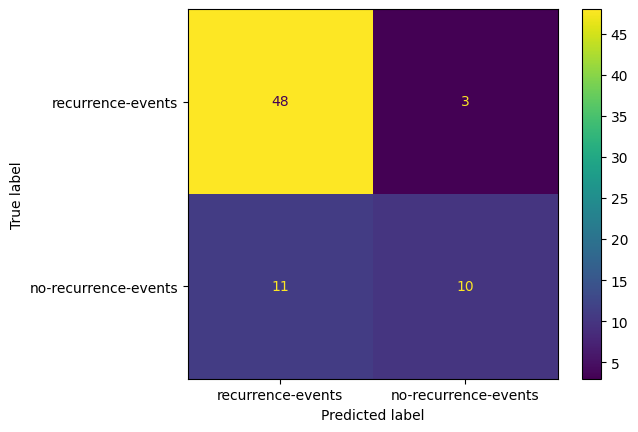

In [311]:
actual =Y_test
predicted=X_test_prediction
confusion_matrix = metrics.confusion_matrix(actual,predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=['recurrence-events','no-recurrence-events'])
cm_display.plot()
plt.show()